In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot') # ggplot gives use interesting diagrams without any style
sns.set_style('white') # the backgoround of every image will be white

In [2]:
a = np.array([2, 4, 6])
print(np.max(a))
    

6


In [3]:
print(np.sum(a))

12


In [4]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2'

In [5]:
wine = datasets.load_wine() # calling wine datasets
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
# creating dataframe var
df_wine = wine.data

In [7]:
# converting df_wine to dataframe
df_wine = pd.DataFrame(df_wine)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
# converting the columns to actual name
df_wine.columns = wine.feature_names
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
# note dat the target column is not yet part of the dataset
df_wine['target'] = wine.target
df_wine.shape

(178, 14)

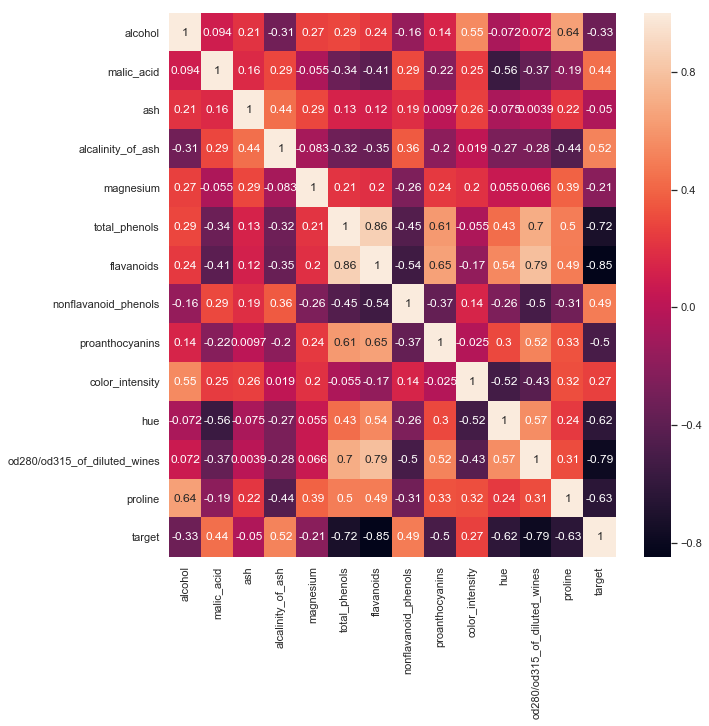

In [10]:
sns.set(rc = {'figure.figsize': (10, 10)})
sns.heatmap(df_wine.corr(), annot=True)

In [11]:
# before we create our model we need train and test sets
x_alca = df_wine.drop(['target','magnesium', 'ash'], axis=1).values
# type(x_alca)
print(x_alca.shape)

(178, 11)


In [32]:
y = df_wine['target'].values
df_wine.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [13]:
# building the model
y = y.reshape(-1,1)
x_alca = x_alca.reshape(-1,11)
print(x_alca.shape)

(178, 11)


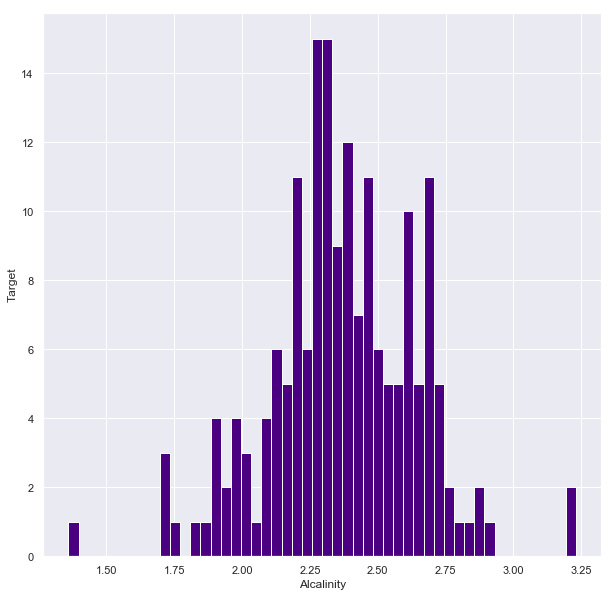

In [14]:
_ = plt.hist('ash', data=df_wine, color='indigo', bins=50)
_ = plt.xlabel('Alcalinity')
_ = plt.ylabel('Target')
plt.show()

In [15]:
reg = LinearRegression()
X_train,X_test, y_train, y_test = train_test_split(x_alca, y, test_size=0.2, stratify=y, random_state=1234)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 11)
(36, 11)
(142, 1)
(36, 1)


In [16]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
print(reg.score(X_test, y_test))

0.9167443929660147


In [19]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.05062146477066395


With the score of 92% and R2 of 0.05062146477066395 we can say categorically gangatically that this model is doing pretty ok

In [20]:
install = pd.read_csv('bikebuyers.csv')

In [21]:
install.head()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
0,19147,Married,Male,1,0,40000,0,4,1,1,42,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
1,22296,Married,Male,1,0,70000,0,4,1,1,38,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
2,25983,Married,Male,1,0,70000,0,4,1,1,43,0,0,Bachelors,Professional,No,0-1 Miles,North America,No
3,29134,Married,Male,1,0,60000,4,4,5,3,42,0,0,Bachelors,Skilled Manual,No,10+ Miles,North America,No
4,27388,Married,Male,1,0,60000,3,4,2,2,66,0,0,Bachelors,Management,No,1-2 Miles,North America,No


In [22]:
install.shape

(1000, 19)

In [23]:
install.describe()

,ID,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19965.992000,0.539000,0.491000,56140.000000,1.908000,3.323000,2.513000,1.452000,44.190000,0.685000,0.481000
std,5347.333948,0.498726,0.500169,31081.609779,1.626094,1.175608,1.426136,1.124705,11.353537,0.464748,0.499889
min,11000.000000,0.000000,0.000000,10000.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,15290.750000,0.000000,0.000000,30000.000000,0.000000,2.000000,1.000000,1.000000,35.000000,0.000000,0.000000
50%,19744.000000,1.000000,0.000000,60000.000000,2.000000,3.000000,2.000000,1.000000,43.000000,1.000000,0.000000
75%,24470.750000,1.000000,1.000000,70000.000000,3.000000,4.000000,4.000000,2.000000,52.000000,1.000000,1.000000
max,29447.000000,1.000000,1.000000,170000.000000,5.000000,5.000000,5.000000,4.000000,89.000000,1.000000,1.000000


In [24]:
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
ID                        1000 non-null int64
Marital Status            1000 non-null object
Gender                    1000 non-null object
MaritalStatusNumeric      1000 non-null int64
GenderNumeric             1000 non-null int64
Income                    1000 non-null int64
Children                  1000 non-null int64
EducationNumeric          1000 non-null int64
CommuteDistanceNumeric    1000 non-null int64
Cars                      1000 non-null int64
Age                       1000 non-null int64
HomeOwnerNumeric          1000 non-null int64
PurchaseBikeNumeric       1000 non-null int64
Education                 1000 non-null object
Occupation                1000 non-null object
Home Owner                1000 non-null object
Commute Distance          1000 non-null object
Region                    1000 non-null object
Purchased Bike            1000 non-null object
dtypes: int6

In [25]:
install.tail()

,ID,Marital Status,Gender,MaritalStatusNumeric,GenderNumeric,Income,Children,EducationNumeric,CommuteDistanceNumeric,Cars,Age,HomeOwnerNumeric,PurchaseBikeNumeric,Education,Occupation,Home Owner,Commute Distance,Region,Purchased Bike
995,14798,Single,Female,0,1,10000,4,1,1,2,41,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
996,16259,Single,Female,0,1,10000,4,1,1,2,40,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
997,16410,Single,Female,0,1,10000,4,1,1,2,41,1,1,Partial High School,Manual,Yes,0-1 Miles,Europe,Yes
998,28957,Single,Female,0,1,120000,0,1,5,4,34,1,1,Partial High School,Professional,Yes,10+ Miles,Pacific,Yes
999,28729,Single,Female,0,1,20000,0,1,2,2,26,1,1,Partial High School,Manual,Yes,1-2 Miles,Europe,Yes


In [26]:
install['Purchased Bike'].tail()

995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Purchased Bike, dtype: object

In [27]:
install['Purchased Bike'] = install['Purchased Bike'].astype('bool')

In [28]:
type(install['Purchased Bike'])

pandas.core.series.Series

In [29]:
install['Purchased Bike'].dtype

dtype('bool')

In [30]:
def changePurchase(col):
    if col == 'Yes':
        return 1
    elif col == 'No':
        return 0
    else:
        return np.nan

In [31]:
install['Purchased Bike'].apply(changePurchasengePurchase)

NameError: name 'changePurchasengePurchase' is not defined